In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
import sklearn.metrics as sm
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [3]:
digits.target.shape

(1797,)

In [4]:
digits.images.shape

(1797, 8, 8)

<Figure size 432x288 with 0 Axes>

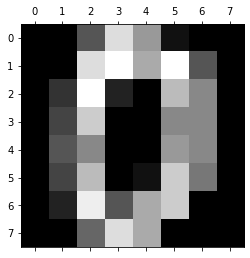

In [5]:
plt.gray()
plt.matshow(digits.images[0])

plt.show()

In [6]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print('Image Data Shape' , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

In [14]:
print('Input Shape of X Train',X_train.shape)
print('Input Shape of Y Train',y_train.shape)
print('Input Shape of X Test',X_test.shape)
print('Input Shape of Y Test',y_test.shape)

Input Shape of X Train (1437, 64)
Input Shape of Y Train (1437,)
Input Shape of X Test (360, 64)
Input Shape of Y Test (360,)


In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Learn the digits on the train subset
model.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

In [18]:
predictions = model.predict(X_test)
score = model.score(X_test, y_test)
# print("Prediction are:", pred)
print("Accuracy Score is :", score)

Accuracy Score is : 0.9666666666666667


In [20]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[27  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  1  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 29  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  0  0 43  0  0  0]
 [ 0  0  0  0  1  0  0 38  0  0]
 [ 0  2  1  0  0  0  0  0 36  0]
 [ 0  0  0  0  0  1  0  0  0 40]]


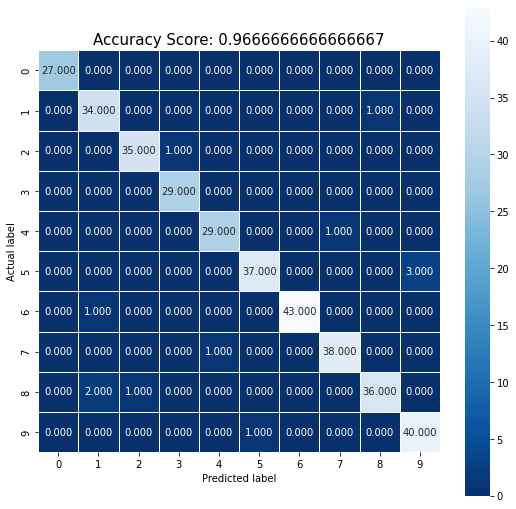

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Display Misclassified images with Predicted Labels Assignment

In [22]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [23]:
print(misclassified_images)

[56, 84, 94, 118, 124, 130, 181, 196, 235, 315, 331, 335]


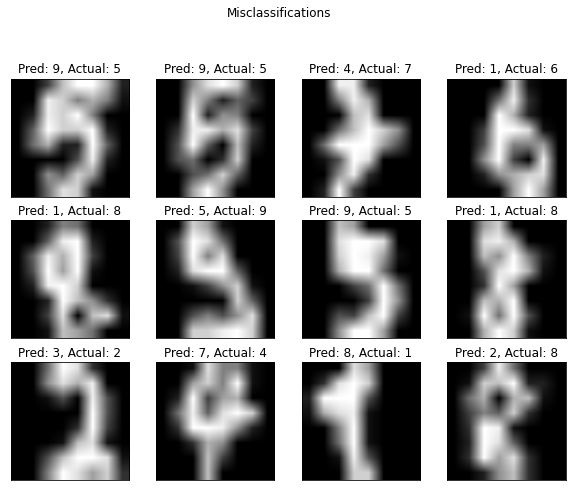

In [27]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[:]):
    p = plt.subplot(4,4, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    ###========---*---========###
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');